In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from IPython import display
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn .preprocessing import StandardScaler


In [376]:
data ,meta = arff.loadarff("dataset_31_credit-g.arff")
df=pd.DataFrame(data)

In [377]:
meta

Dataset: german_credit
	checking_status's type is nominal, range is ('<0', '0<=X<200', '>=200', 'no checking')
	duration's type is numeric
	credit_history's type is nominal, range is ('no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit')
	purpose's type is nominal, range is ('new car', 'used car', 'furniture/equipment', 'radio/tv', 'domestic appliance', 'repairs', 'education', 'vacation', 'retraining', 'business', 'other')
	credit_amount's type is numeric
	savings_status's type is nominal, range is ('<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings')
	employment's type is nominal, range is ('unemployed', '<1', '1<=X<4', '4<=X<7', '>=7')
	installment_commitment's type is numeric
	personal_status's type is nominal, range is ('male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single')
	other_parties's type is nominal, range is ('none', 'co applicant', 'guarantor')
	residence_since's type is nume

In [378]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [380]:
categorical=[coulmn for coulmn in df.columns if df[coulmn].dtype=="object"]
numerical=[coulmn for coulmn in df.columns if df[coulmn].dtype!="object"]
numerical
categorical
categorical.remove("class")

In [381]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [382]:
X=df.drop(["class"],axis=1)
y=df["class"]
y=y.replace({b'good':1 ,b'bad' :0})



In [383]:
X_numerical=X[numerical]


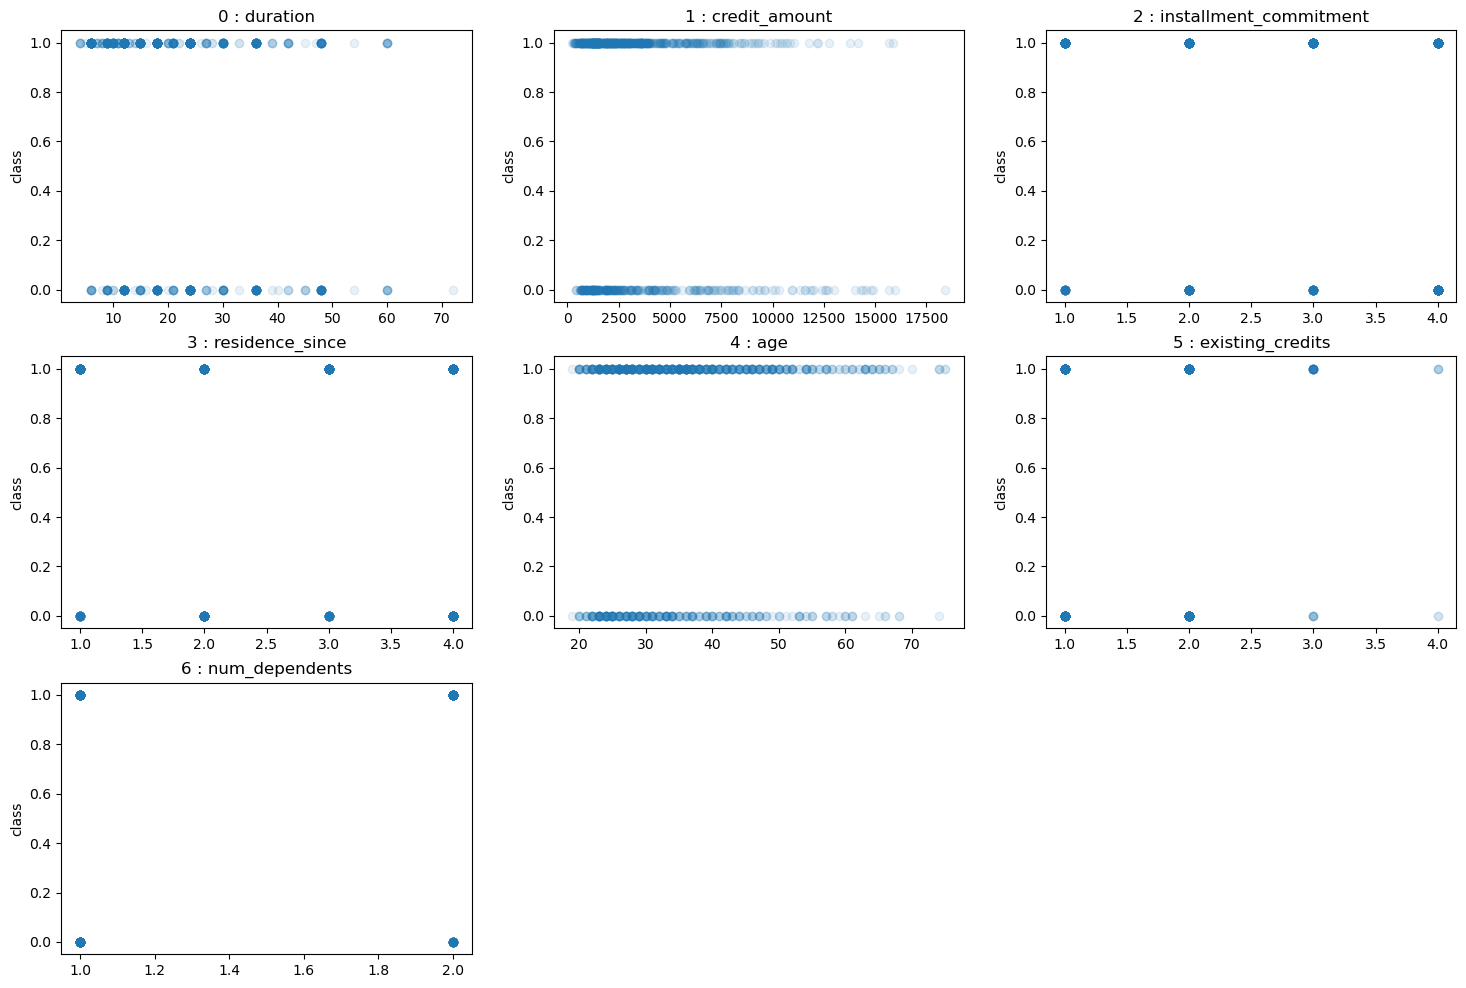

In [384]:
fig ,axes=plt.subplots(3,3,figsize=(18,12))
for i ,ax in enumerate(axes.ravel()):
    if i>len(numerical)-1:
        ax.set_visible(False)
        continue
    X_col=X_numerical.iloc[:,i]
    ax.scatter(X_col,y,alpha=.1)
    ax.set_title(f"{i} : {X_numerical.columns[i]}")
    ax.set_ylabel("class")



existing_credits
1.0    633
2.0    333
3.0     28
4.0      6
Name: count, dtype: int64


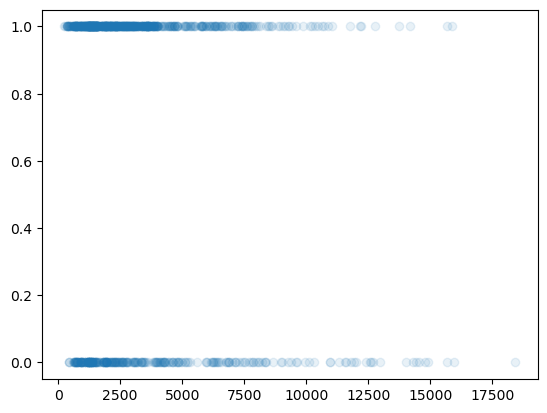

In [385]:
print(X.existing_credits.value_counts())
X.credit_amount.quantile(q=.99)
plt.scatter(X["credit_amount"],y,alpha=.1)

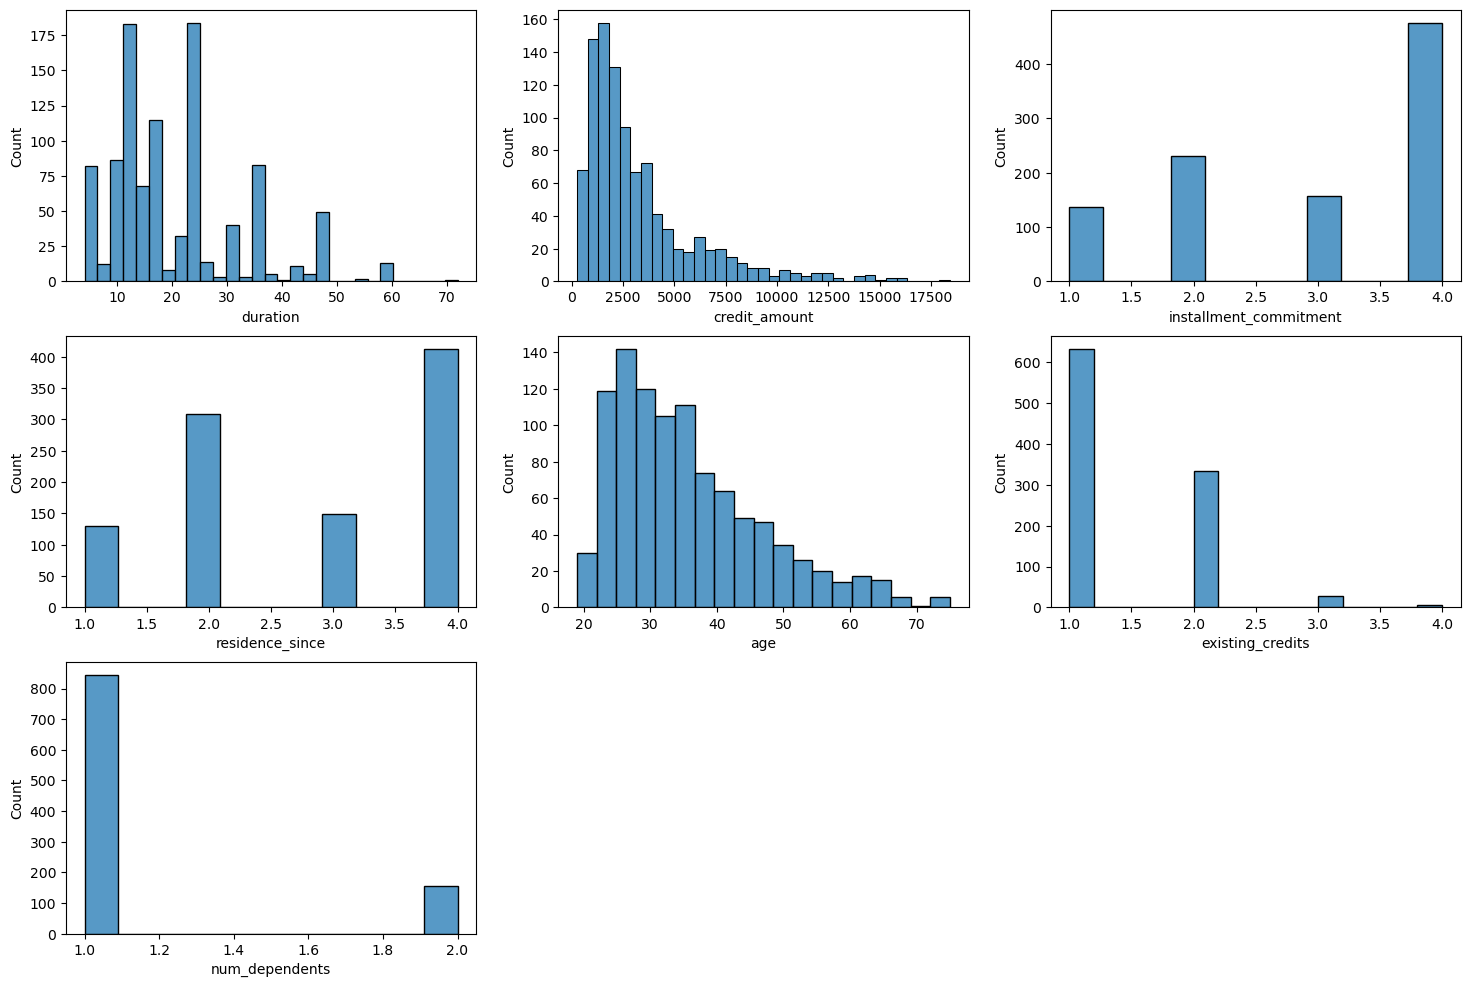

In [386]:
fig,axes=plt.subplots(3,3,figsize=(18,12))
for i ,ax in enumerate(axes.ravel()):
    if i >=len(numerical):
        ax.set_visible(False)
        continue
    X_col=X_numerical.iloc[:,i]
    sns.histplot(X_col,ax=ax)

<Axes: >

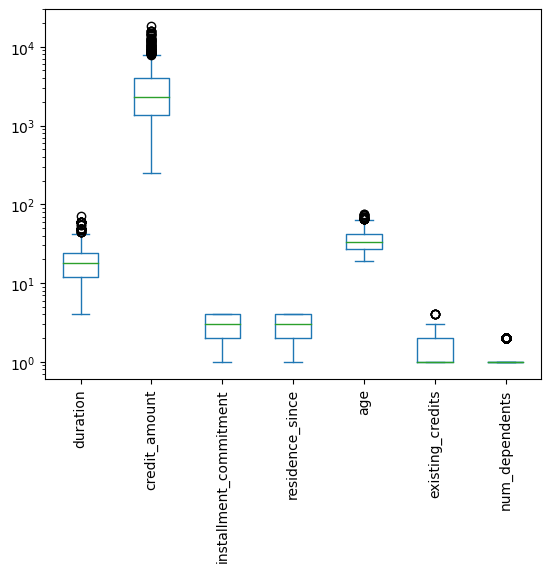

In [387]:
X_numerical.plot(kind='box',rot=90,logy=True)

In [388]:
X_categorical=X[categorical]
for category in categorical:
    print(X[category].value_counts())
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
# X=pd.get_dummies(X,columns=categorical)


checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: count, dtype: int64
credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: count, dtype: int64
purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9
Name: count, dtype: int64
savings_status
b'<100'                603
b'no known savings'    183
b'100<=X<500'          103
b'500<=X<1000'          63
b'>=1000'               48
Name: count, dtype: int64
employment
b'1<=X<4'        339
b'>=7'           253
b'4<=X<7'        174
b'<1'            172
b'unemployed'     6

In [389]:
y=y.astype("int32")
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,test_size=.2)
X_train,X_val,y_train,y_val=train_test_split(X_trainval,y_trainval,test_size=.2)



In [390]:

X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_val=pd.get_dummies(X_val)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [391]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)


In [392]:
from sklearn.linear_model import LogisticRegression


In [393]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.260619,-0.185041,0.938903,1.061000,0.059978,-0.743300,-0.440488,1.689799,-0.596601,-0.268378,...,-1.642992,-0.445535,-0.380659,0.738846,-0.143992,-0.509748,-1.286702,1.286702,-0.193073,0.193073
1,0.260619,0.527485,-0.838902,1.061000,-0.940605,-0.743300,-0.440488,1.689799,-0.596601,-0.268378,...,0.608646,-0.445535,-0.380659,-1.353462,-0.143992,1.961756,0.777181,-0.777181,-0.193073,0.193073
2,-0.234815,1.874288,-1.727804,-0.759483,-1.122529,1.038393,-0.440488,-0.591786,1.676163,-0.268378,...,-1.642992,2.244490,-0.380659,0.738846,-0.143992,-0.509748,-1.286702,1.286702,-0.193073,0.193073
3,1.251488,-0.190090,0.938903,1.061000,-0.394832,-0.743300,-0.440488,-0.591786,1.676163,-0.268378,...,0.608646,-0.445535,-0.380659,0.738846,-0.143992,-0.509748,0.777181,-0.777181,-0.193073,0.193073
4,-0.730250,-0.641909,0.938903,0.150759,-0.121946,-0.743300,2.270208,-0.591786,-0.596601,-0.268378,...,0.608646,-0.445535,-0.380659,0.738846,-0.143992,-0.509748,0.777181,-0.777181,-0.193073,0.193073


In [394]:
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_b'0<=X<200',checking_status_b'<0',checking_status_b'>=200',...,housing_b'own',housing_b'rent',job_b'high qualif/self emp/mgmt',job_b'skilled',job_b'unemp/unskilled non res',job_b'unskilled resident',own_telephone_b'none',own_telephone_b'yes',foreign_worker_b'no',foreign_worker_b'yes'
198,24.0,2760.0,4.0,4.0,36.0,1.0,1.0,True,False,False,...,False,False,False,True,False,False,False,True,False,True
911,24.0,4736.0,2.0,4.0,25.0,1.0,1.0,True,False,False,...,True,False,False,False,False,True,True,False,False,True
417,18.0,8471.0,1.0,2.0,23.0,2.0,1.0,False,True,False,...,False,True,False,True,False,False,False,True,False,True
315,36.0,2746.0,4.0,4.0,31.0,1.0,1.0,False,True,False,...,True,False,False,True,False,False,True,False,False,True
638,12.0,1493.0,4.0,3.0,34.0,1.0,2.0,False,False,False,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,24.0,4110.0,3.0,4.0,23.0,2.0,2.0,False,True,False,...,False,True,False,True,False,False,True,False,False,True
311,24.0,5511.0,4.0,1.0,25.0,1.0,1.0,False,False,False,...,True,False,False,True,False,False,True,False,False,True
910,36.0,4454.0,4.0,4.0,34.0,2.0,1.0,False,False,False,...,True,False,False,True,False,False,True,False,False,True
608,18.0,2051.0,4.0,1.0,33.0,1.0,1.0,False,False,False,...,True,False,False,True,False,False,True,False,False,True


In [395]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f"train score :{model.score(X_train,y_train)}")
print(f"test score :{model.score(X_test,y_test)}")
print(f"val score :{model.score(X_val,y_val)}")

train score :0.7859375
test score :0.735
val score :0.6625


c:\Users\Mohamed Mosaad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [396]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
print(f"train score :{model.score(X_train_scaled,y_train)}")
print(f"test score :{model.score(X_test_scaled,y_test)}")
print(f"val score :{model.score(X_val_scaled,y_val)}")

train score :0.80625
test score :0.755
val score :0.69375


In [397]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [399]:
X=df.drop(["class"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [409]:
preprocess=ColumnTransformer(
                            transformers=[
                             ('num',OneHotEncoder(),categorical)
                             ,('cat',StandardScaler(),numerical)])

In [410]:
preprocess

ColumnTransformer(transformers=[('num', OneHotEncoder(),
                                 ['checking_status', 'credit_history',
                                  'purpose', 'savings_status', 'employment',
                                  'personal_status', 'other_parties',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing', 'job', 'own_telephone',
                                  'foreign_worker']),
                                ('cat', StandardScaler(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents'])])

In [414]:

logistic_pipe=Pipeline(steps=[
    ('preprocessor',preprocess),
    ('classifier',LogisticRegression())])
logistic_pipe.fit(X_train,y_train)
np.mean(cross_val_score(logistic_pipe,X_train,y_train,cv=10))

0.7474999999999999

In [417]:
svc_pipe=make_pipeline(preprocess,SVC())
np.mean(cross_val_score(svc_pipe,X_train,y_train,cv=10))

0.7474999999999999